<a href="https://colab.research.google.com/github/AmanPriyanshu/Reinforcement-Learning/blob/master/BasicReinforcementLearning_paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim is to find the best action between throwing or moving to a better position in order to get paper into a bin (trash can).

A policy is the currently recommended actions for all given states. The states (s and s′) are the position in the room and the actions (a) are either moving in one of 8 directions (north, north east, east, … north west) or throwing in any 360 degree direction (0,1,2,3,4,…,359,360 degrees) from due north (see Navigation Bearings).

This defines our probabilistic environment and transition function:

`P(s,s′)=P(s_{t+1}=s′|s_t=s,a_t=a)`

is the probability of transition from state s to state s′ under action a

## Probability Function:

This function defines the probability of a successful throw from any given state and is calculated by the following:
First, if the position is the same as the bin (i.e. the person is directly inside the bin already) then the probability is fixed to 100%.

We then calculate the bearing from the person to the bin following the previous figure and calculate the score bounded within a +/- 45 degree window. Throws that are closest to the true bearing score higher whilst those further away score less, anything more than 45 degrees (or less than -45 degrees) are negative and then set to a zero probability.

In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

## Let us create our environment

In [2]:
main_map = np.zeros((20, 20))

In [3]:
bin = (random.randint(0,19), random.randint(0,19))
start_state = (random.randint(0,19), random.randint(0,19))

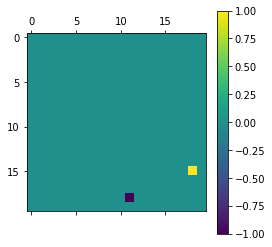

In [4]:
current_visuals = main_map
current_visuals[bin[0], bin[1]] = 1
current_visuals[start_state[0], start_state[1]] = -1

plt.matshow(current_visuals)
plt.colorbar()
plt.show()

### Compiling the above three lines

In [5]:
def initialize(seed=None):
  if seed == None:
    seed = random.randint(0, 100)
  random.seed(seed)
  main_map = np.zeros((10, 10))
  bin = (random.randint(0,9), random.randint(0,9))
  start_state = (random.randint(0,9), random.randint(0,9))
  current_visuals = main_map
  current_visuals[bin[0], bin[1]] = 1
  current_visuals[start_state[0], start_state[1]] = -1

  return {'main_map': main_map, 'start_state': start_state, 'bin': bin, 'current_visuals':current_visuals}

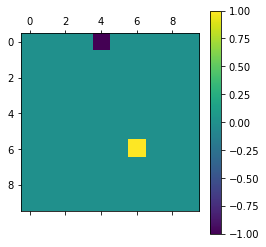

In [6]:
env = initialize(0)
plt.matshow(env['current_visuals'])
plt.colorbar()
plt.show()

## Temporal Difference:

`Given by V(s) <- V(s) + alpha * (r + gamma * V(s') - V(s) )`

In [7]:
alpha = 0.5
gamma = 0.5
eps = 0.1

In [8]:
def valid_steps(start):
  possible_states = [[i//10, i%10] for i in range(10*10) if (((start[0]-i//10)**2+(start[1]-i%10)**2)**0.5)<2 and (((start[0]-i//10)**2+(start[1]-i%10)**2)**0.5)!=0]
  return possible_states

In [9]:
def next_step(ps, v, eps=0.1):
  v_next = []
  for (i,j) in ps:
    v_next.append(v[i][j])
  if random.random()>eps:
    return ps[np.argmax(v_next)]
  else:
    return ps[random.randint(0, len(ps)-1)]

In [10]:
def train(alpha=0.5, gamma=0.5, eps=0.1):
  rewards = []
  steps = []
  for episode in range(1,101):
    env = initialize(seed=episode)
    v = np.zeros((10, 10))
    s = env['start_state']
    r = 0
    done = False
    steps_taken = 0
    while done==False and steps_taken<1000:
      steps_taken += 1
      ps = valid_steps(s)
      s_dash = next_step(ps, v, eps)

      if s_dash[0] == env['bin'][0] and s_dash[1] == env['bin'][1]:
        r += 10
        done = True

      v[s[0]][s[1]] = v[s[0]][s[1]] + alpha * (r + gamma * v[s_dash[0]][s_dash[1]] - v[s[0]][s[1]])

      if done==True:
        break
      s = s_dash

    rewards.append(r)
    steps.append(steps_taken)
  return rewards, steps

In [11]:
rewards, steps_taken = train()

## Let us see how well our model performed

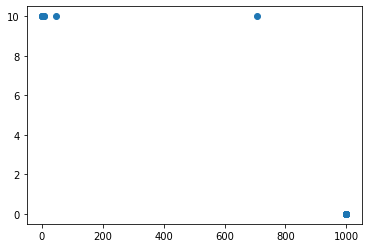

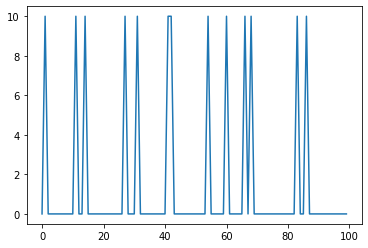

In [12]:
plt.scatter(steps_taken, rewards)
plt.show()
plt.clf()
plt.plot(rewards)
plt.show()

## Let us try making our model more exploratory

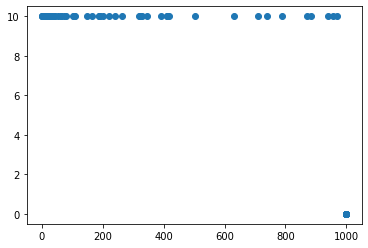

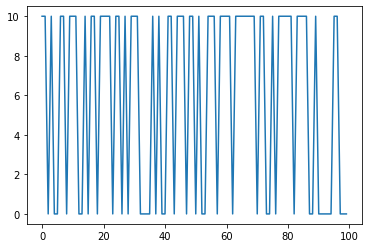

In [13]:
rewards, steps_taken = train(alpha=0.5, gamma=0.5, eps=0.75)
plt.scatter(steps_taken, rewards)
plt.show()
plt.clf()
plt.plot(rewards)
plt.show()

## Now, what if we give rewards for getting closer:

In [14]:
def train2(alpha=0.5, gamma=0.5, eps=0.1):
  rewards = []
  steps = []
  for episode in range(1,101):
    env = initialize(seed=episode)
    v = np.zeros((10, 10))
    s = env['start_state']
    r = 0
    done = False
    steps_taken = 0
    prev_score = 0
    while done==False and steps_taken<1000:
      steps_taken += 1
      ps = valid_steps(s)
      s_dash = next_step(ps, v, eps)

      if s_dash[0] == env['bin'][0] and s_dash[1] == env['bin'][1]:
        r += 1000
        done = True
      else:
        score = 10/(( s_dash[0] - env["bin"][0] )**2 + ( s_dash[1] - env["bin"][1] )**2)**0.5
        if score > prev_score:
          r += score
          prev_score = score
        else:
          r += -score
          prev_score = score

      v[s[0]][s[1]] = v[s[0]][s[1]] + alpha * (r + gamma * v[s_dash[0]][s_dash[1]] - v[s[0]][s[1]])

      if done==True:
        break
      s = s_dash
    rewards.append(r)
    steps.append(steps_taken)
  return rewards, steps

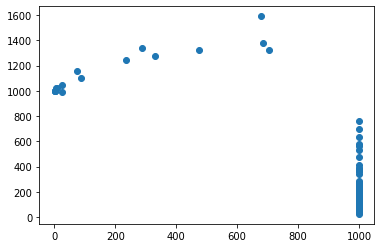

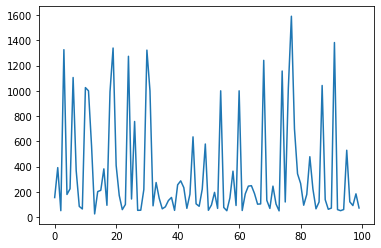

In [15]:
rewards, steps_taken = train2(alpha=0.5, gamma=0.5, eps=0.1)
plt.scatter(steps_taken, rewards)
plt.show()
plt.clf()
plt.plot(rewards)
plt.show()

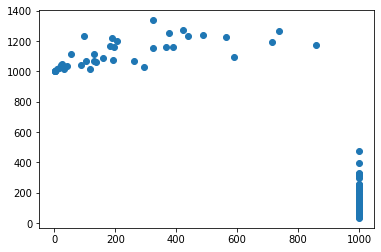

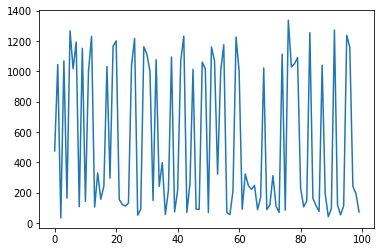

In [16]:
rewards, steps_taken = train2(alpha=0.5, gamma=0.5, eps=0.25)
plt.scatter(steps_taken, rewards)
plt.show()
plt.clf()
plt.plot(rewards)
plt.show()

## Let us visualise one

In [18]:
def visualise_train2(alpha=0.5, gamma=0.5, eps=0.25, seed=11):
  rewards = []
  steps = []
  for episode in [seed]:
    env = initialize(seed=episode)
    v = np.zeros((10, 10))
    s = env['start_state']
    r = 0
    done = False
    steps_taken = 0
    prev_score = 0
    while done==False and steps_taken<1000:
      steps_taken += 1
      ps = valid_steps(s)
      s_dash = next_step(ps, v, eps)

      if s_dash[0] == env['bin'][0] and s_dash[1] == env['bin'][1]:
        r += 100
        done = True
      else:
        score = 10/(( s_dash[0] - env["bin"][0] )**2 + ( s_dash[1] - env["bin"][1] )**2)**0.5
        if score > prev_score:
          r += score
          prev_score = score
        else:
          r += -score
          prev_score = score

      v[s[0]][s[1]] = v[s[0]][s[1]] + alpha * (r + gamma * v[s_dash[0]][s_dash[1]] - v[s[0]][s[1]])
      if steps_taken%20==0:
        v_plot = (v - np.min(v))/(np.max(v) - np.min(v))
        v_plot[env['bin'][0]][env['bin'][1]] = 2
        v_plot[env['start_state'][0]][env['start_state'][1]] = -1
        plt.matshow(v_plot)
        plt.colorbar()
        plt.pause(0.1)


      if done==True:
        v_plot = (v - np.min(v))/(np.max(v) - np.min(v))
        v_plot[env['bin'][0]][env['bin'][1]] = 2
        v_plot[s_dash[0]][s_dash[1]] = 1.5
        v_plot[env['start_state'][0]][env['start_state'][1]] = -1
        plt.matshow(v_plot)
        plt.colorbar()
        plt.pause(0.1)
        break
      s = s_dash
    print(steps_taken)

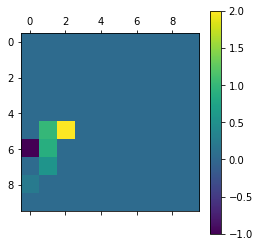

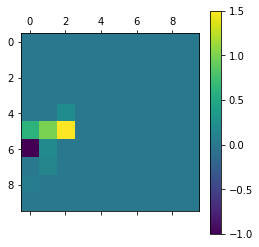

33


In [19]:
visualise_train2(seed=7)

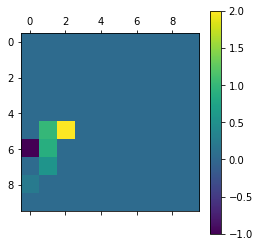

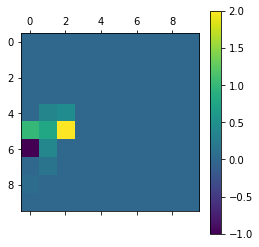

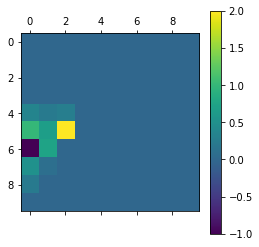

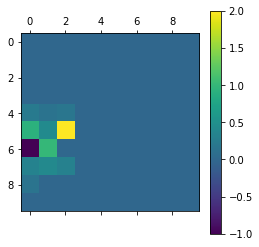

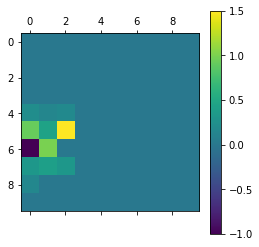

80


In [20]:
visualise_train2(seed=7, eps=0.2)

In [21]:
def visualise_train3(alpha=0.5, gamma=0.5, eps=0.25, seed=11, epoch=20):
  rewards = []
  steps = []
  for episode in [seed]:
    env = initialize(seed=episode)
    v = np.zeros((10, 10))
    s = env['start_state']
    r = 0
    done = False
    steps_taken = 0
    prev_score = 10/(( s[0] - env["bin"][0] )**2 + ( s[1] - env["bin"][1] )**2)**0.5
    while done==False and steps_taken<1000:
      steps_taken += 1
      ps = valid_steps(s)
      s_dash = next_step(ps, v, eps)

      if s_dash[0] == env['bin'][0] and s_dash[1] == env['bin'][1]:
        r += 100
        done = True
      else:
        score = 10/(( s_dash[0] - env["bin"][0] )**2 + ( s_dash[1] - env["bin"][1] )**2)**0.5
        if score > prev_score:
          r += score/5
          prev_score = score
        else:
          r += -score

      v[s[0]][s[1]] = v[s[0]][s[1]] + alpha * (r + gamma * v[s_dash[0]][s_dash[1]] - v[s[0]][s[1]])
      if steps_taken%epoch==0:
        v_plot = (v - np.min(v))/(np.max(v) - np.min(v))
        v_plot[env['bin'][0]][env['bin'][1]] = 2
        v_plot[s_dash[0]][s_dash[1]] = 1.5
        v_plot[env['start_state'][0]][env['start_state'][1]] = -1
        plt.matshow(v_plot)
        plt.colorbar()
        plt.pause(0.1)


      if done==True:
        v_plot = (v - np.min(v))/(np.max(v) - np.min(v))
        v_plot[env['bin'][0]][env['bin'][1]] = 2
        v_plot[s_dash[0]][s_dash[1]] = 1.5
        v_plot[env['start_state'][0]][env['start_state'][1]] = -1
        plt.matshow(v_plot)
        plt.colorbar()
        plt.pause(0.1)
        break
      s = s_dash
    print(steps_taken)

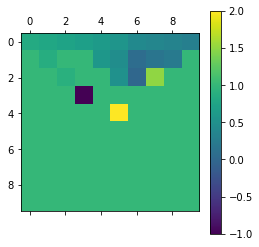

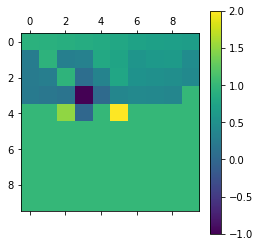

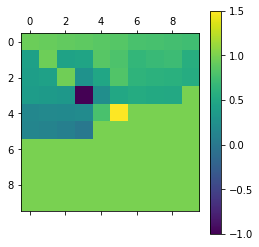

48


In [22]:
visualise_train3(seed=77, eps=0.05)

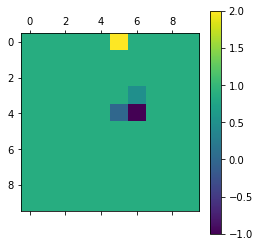

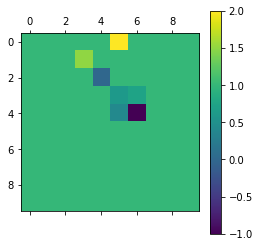

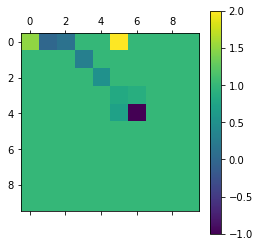

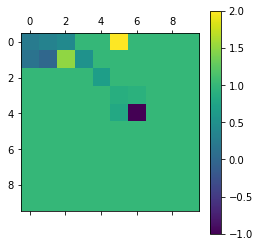

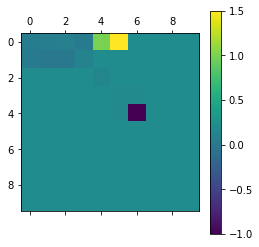

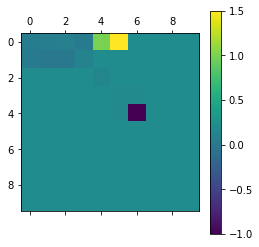

15


In [24]:
visualise_train3(seed=420, eps=0.15, alpha=0.05, gamma=0.99, epoch=3)